# Data Scientist Professional Practical Exam Submission

**Nicolas Foss**

# High Traffic Recipe Classification for Tasty Bytes

## Introduction

In order to produce an analytics product that meets the needs of Tasty Bytes, I will take a step-wise approach.

1. Data validation: First, I will explore the dataset and validate the data to ensure that it is suitable for exploratory data analysis, and later, modeling.  During this step, I will explore each feature of the dataset to ensure the data are valid.
2. Exploratory data analysis: Next, I will provide a few graphs of single variables to demonstrate characteristics of the data.  I will also include a graph to show two or more variables within a plot to show relationships between features in the dataset.  I will describe my findings here.
3. Model development: I will provide the justification for the models that I choose to use based on the problem type that I identify.  I will compare two models together to find the best fit to answer the call of the business problem.
4. Model evaluation: In this step, my goal will be to demonstrate how I evaluate the performance of the two models I selected and developed.  
5. Business metrics: Here, my goal will be to show Tasty Bytes how the final and best model compares to the business's current performance.  This will be focused on the KPIs that the business has identified.  I will show how my model performs.
6. Last, I will summarize my findings and my recommendations for the business.

Let's get to coding!

**In this section we will load some packages into our R session so that we can get started with the work at hand.**

In [1]:
# Install packages and load
install.packages(c("tidyverse", "janitor", "naniar", "mice", "patchwork"), quiet = TRUE)
library(tidyverse, quietly = TRUE)
library(janitor, quietly = TRUE)
library(naniar, quietly = TRUE)
library(broom, quietly = TRUE)
library(mice, quietly = TRUE)
library(patchwork, quietly = TRUE)

also installing the dependencies ‘norm’, ‘visdat’, ‘UpSetR’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




## Load in the data - Examine its structure.

**Fortunately, the Head of Data Science has provided us a first look at the data so we know what to expect based on what Tasty Bytes has told us about the file.**

We expect the data to have this structure:

**Organization**

- name, Type, Details
- recipe Numeric, unique identifier of recipe
- calories Numeric, number of calories
- carbohydrate Numeric, amount of carbohydrates in grams
- sugar Numeric, amount of sugar in grams
- protein Numeric, amount of protein in grams
- category Character, type of recipe. Recipes are listed in one of ten possible groupings (Lunch/Snacks', 'Beverages', 'Potato','Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal').
- servings Numeric, number of servings for the recipe
- high_traffic Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”.


### A slight hiccup...

Unfortunately, upon review of the structure of the data, we can see that there are some problems.

- recipe is not a numeric vector, it is a character vector.
- 52 rows contain NA values from calories through protein.  These missing values constitute 5% of the data in those columns.
- 39% of the values in the high_traffic column are missing.
- servings is not a numeric vector, it is also a character.
- Overall, 7.7% of the data are missing across the whole dataset.
- Otherwise, none of the values are missing in the recipe, category, and servings columns.

We will need to engage in some data manipulation and wrangling to prepare this dataset for further analyses.

Rows: 947 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): recipe, category, servings, high_traffic
dbl (4): calories, carbohydrate, sugar, protein

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


    recipe             calories        carbohydrate         sugar        
 Length:947         Min.   :   0.14   Min.   :  0.030   Min.   :  0.010  
 Class :character   1st Qu.: 110.43   1st Qu.:  8.375   1st Qu.:  1.690  
 Mode  :character   Median : 288.55   Median : 21.480   Median :  4.550  
                    Mean   : 435.94   Mean   : 35.070   Mean   :  9.047  
                    3rd Qu.: 597.65   3rd Qu.: 44.965   3rd Qu.:  9.800  
                    Max.   :3633.16   Max.   :530.420   Max.   :148.750  
                    NA's   :52        NA's   :52        NA's   :52       
    protein          category           servings         high_traffic      
 Min.   :  0.000   Length:947         Length:947         Length:947        
 1st Qu.:  3.195   Class :character   Class :character   Class :character  
 Median : 10.800   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 24.149                                                           
 3rd Qu.: 30.200            

spc_tbl_ [947 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ recipe      : chr [1:947] "001" "002" "003" "004" ...
 $ calories    : num [1:947] NA 35.5 914.3 97 27.1 ...
 $ carbohydrate: num [1:947] NA 38.56 42.68 30.56 1.85 ...
 $ sugar       : num [1:947] NA 0.66 3.09 38.63 0.8 ...
 $ protein     : num [1:947] NA 0.92 2.88 0.02 0.53 ...
 $ category    : chr [1:947] "Pork" "Potato" "Breakfast" "Beverages" ...
 $ servings    : chr [1:947] "6" "4" "1" "4" ...
 $ high_traffic: chr [1:947] "High" "High" NA "High" ...
 - attr(*, "spec")=
  .. cols(
  ..   recipe = col_character(),
  ..   calories = col_double(),
  ..   carbohydrate = col_double(),
  ..   sugar = col_double(),
  ..   protein = col_double(),
  ..   category = col_character(),
  ..   servings = col_character(),
  ..   high_traffic = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


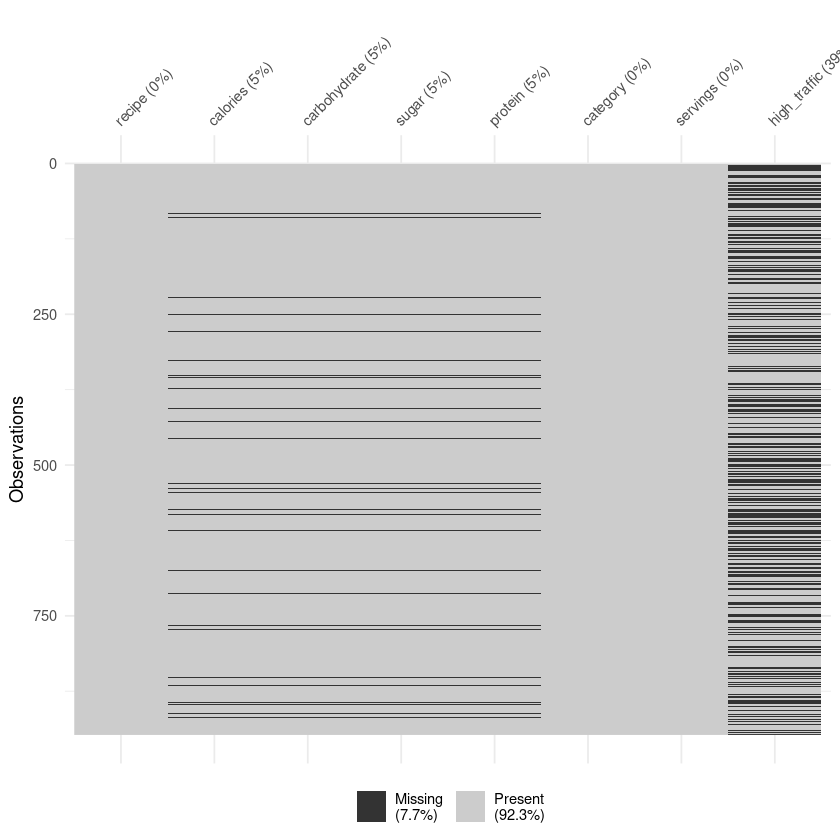

,recipe,category,servings,calories,carbohydrate,sugar,protein,high_traffic,
535,1,1,1,1,1,1,1,1,0
360,1,1,1,1,1,1,1,0,1
39,1,1,1,0,0,0,0,1,4
13,1,1,1,0,0,0,0,0,5
,0,0,0,52,52,52,52,373,581


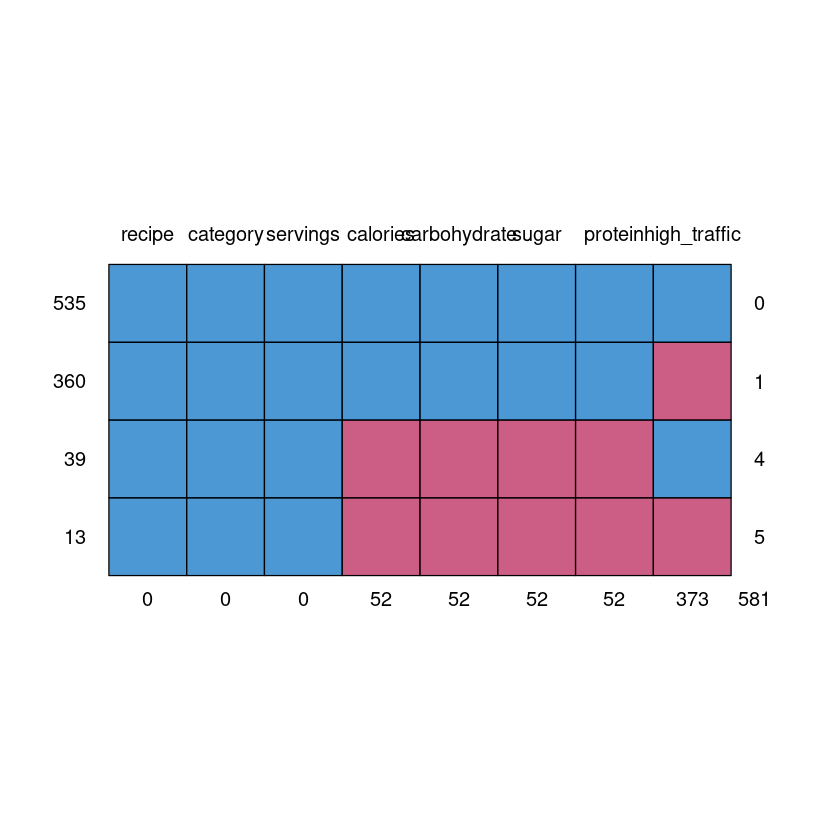

In [2]:
# Read in the data from the URL provided by the Head of Data Science

recipe_site_traffic <- read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/recipe_site_traffic_2212.csv")

# View a summary of the columns and then view the structure of the data

summary(recipe_site_traffic)
str(recipe_site_traffic)

vis_miss(recipe_site_traffic)

md.pattern(recipe_site_traffic)

### View the Recipe Site Traffic data

Given the structure of the data, a few things are clear:

1. The recipe column may actually be better served as a character column given that these numbers actually seem to act as factors.  However, we will not use them as factors because this will create far too many levels to be useful.  Instead, we will keep this column as a character vector which could be more useful in our modeling process down the road.
2. The calories through protein columns have some missing values and they are all in the same rows.  We will use the 'mice' package to choose the best method to impute new values into those missing values, and then impute.  The 'mice' package in R has a nice solution for choosing the best method rather than leaving it up to the judgement of the scientist.  I will make sure to identify the method along the way.
3. The high_traffic column seems to need to be manipulated to change all missing values to "Low", given its structure.  Even better, we might benefit from using binary values of 0 and 1 for this column with 0 being "Low", and 1 being "High".
4. servings may be better served as a factor given that it should only have 4 unique values (1,2,4,6), but it does have some values that do not fit "4 as a snack" and "6 as a snack".  These values will need to be changed to 4, and 6 respectively.  The whole column will be used as a factor.
5. The numeric variables are all measured in grams, so we will not need to scale the data for modeling.

In [3]:
# View the data in the R viewer

head(recipe_site_traffic, n = 50)

paste0("Show the unique values in ", '"servings"', " and ", '"category"', " to see if they conform to expectations, recipe does not need to be seen as it is a character vector from 001 through 947.")
unique(recipe_site_traffic$servings)
unique(recipe_site_traffic$category)

recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
001,NA,NA,NA,NA,Pork,6,High
002,35.48,38.56,0.66,0.92,Potato,4,High
003,914.28,42.68,3.09,2.88,Breakfast,1,NA
004,97.03,30.56,38.63,0.02,Beverages,4,High
005,27.05,1.85,0.80,0.53,Beverages,4,NA
006,691.15,3.46,1.65,53.93,One Dish Meal,2,High
007,183.94,47.95,9.75,46.71,Chicken Breast,4,NA
008,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NA
009,538.52,3.78,3.37,3.79,Pork,6,High


[1] "Show the unique values in \"servings\" and \"category\" to see if they conform to expectations, recipe does not need to be seen as it is a character vector from 001 through 947."

[1] "6"            "4"            "1"            "2"            "4 as a snack"
[6] "6 as a snack"

[1] "Pork"           "Potato"         "Breakfast"      "Beverages"     
 [5] "One Dish Meal"  "Chicken Breast" "Lunch/Snacks"   "Chicken"       
 [9] "Vegetable"      "Meat"           "Dessert"

## Data Wrangling

#### Multiple Imputation

Let's get to the work of addressing offending variables so we can get to exploratory data analysis!

We use mean imputation only on the numeric columns to eliminate the NA values and make the dataset more appropriate for further analyses.

In [4]:
# Create an object for multiple imputation
# Define target columns inside the 'mice' function for clarity.

mice_traffic <- mice(recipe_site_traffic, method = c("", "mean", "mean", "mean", "mean", "", "", ""), print = FALSE)

# Return mice object to dataset

recipe_site_traffic <- complete(mice_traffic)

# view dataset with imputations, notice recipe 001 no longer has NA values.
recipe_site_traffic

Warning message:
“Number of logged events: 4”


recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
001,435.9392,35.06968,9.046547,24.1493,Pork,6,High
002,35.4800,38.56000,0.660000,0.9200,Potato,4,High
003,914.2800,42.68000,3.090000,2.8800,Breakfast,1,NA
004,97.0300,30.56000,38.630000,0.0200,Beverages,4,High
005,27.0500,1.85000,0.800000,0.5300,Beverages,4,NA
006,691.1500,3.46000,1.650000,53.9300,One Dish Meal,2,High
007,183.9400,47.95000,9.750000,46.7100,Chicken Breast,4,NA
008,299.1400,3.17000,0.400000,32.4000,Lunch/Snacks,4,NA
009,538.5200,3.78000,3.370000,3.7900,Pork,6,High


#### Dataset after first round of data wrangling

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,
574,1,1,1,1,1,1,1,1,0
373,1,1,1,1,1,1,1,0,1
,0,0,0,0,0,0,0,373,373


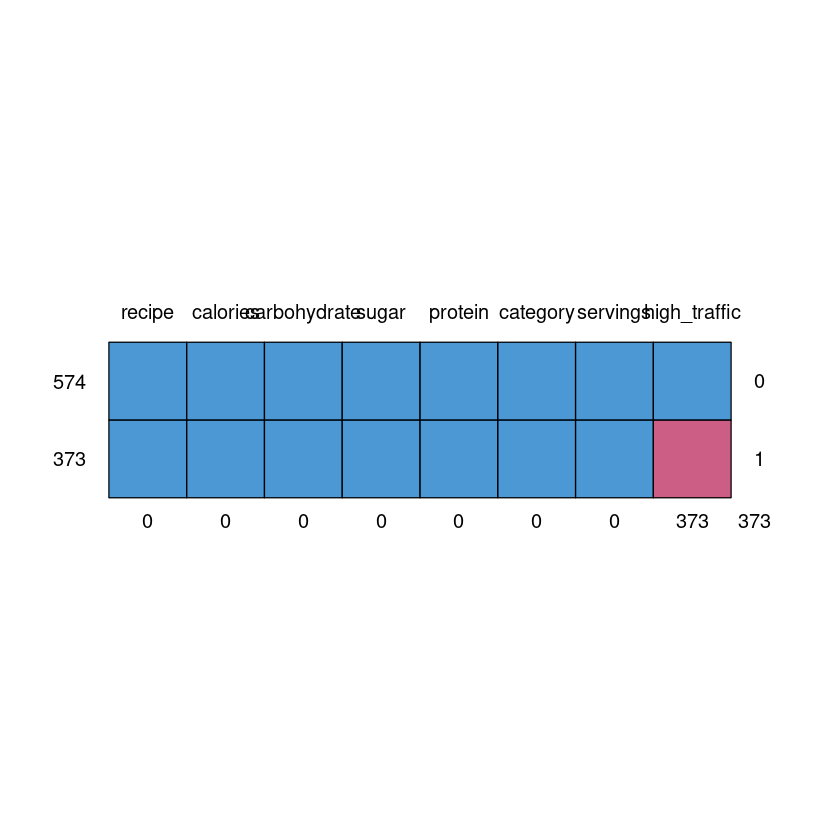

In [5]:
md.pattern(recipe_site_traffic)

#### Wrangle the high_traffic column et al.

We utilize the dplyr package to make the high_traffic column binary through an if_else statement.  Low = 0, and High = 1.

We eliminated the extra characters in a few rows in the servings column and made those rows conform to the structure of the majority of that column.  We will leave the rest of the columns alone as they will function fine for plotting and modeling in the next steps.

Success!  We now have a complete dataset that is ready for exploratory analyses.

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,
947,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0


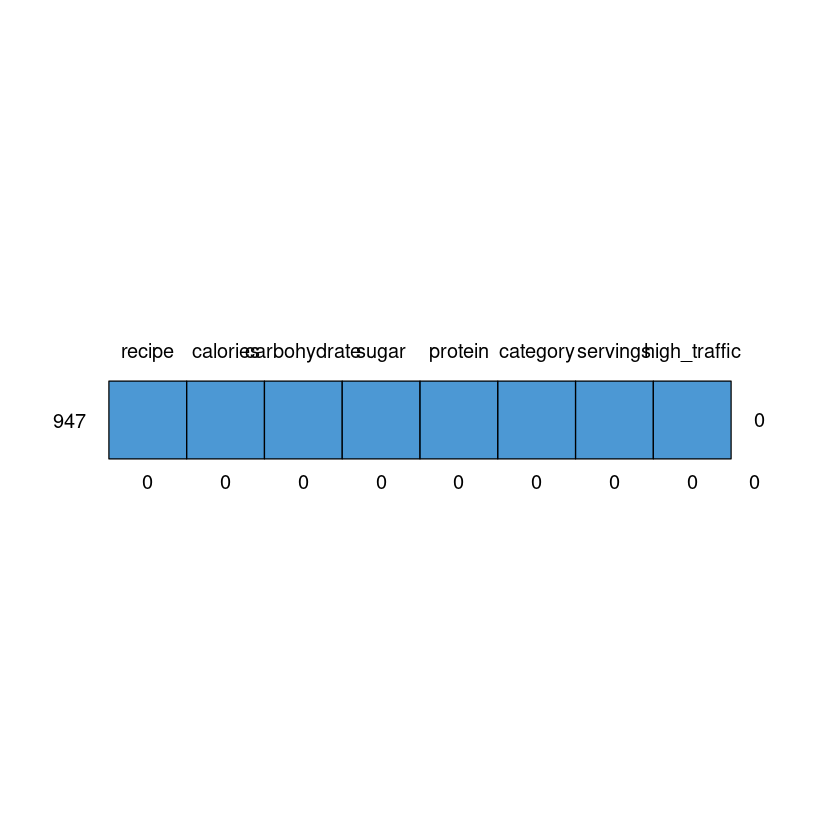

In [6]:
# Utilize dplyr to deal with the null values in high_traffic
# If the row has a null value for high_traffic, impute 0, otherwise impute 1.

recipe_site_traffic <- recipe_site_traffic %>% 
mutate(high_traffic = if_else(is.na(high_traffic), 0, 1),
	  servings = if_else(servings == "4 as a snack", "4",
						if_else(servings == "6 as a snack", "6", servings
							   )
						)
	  )

md.pattern(recipe_site_traffic)

#### State of the dataset after wrangling

A quick look at the summary of the dataset after data wrangling is complete.

We may need to do a bit of data manipulation later on, but it will be minor compared to what we already did.

In [7]:
summary(recipe_site_traffic)

paste0("Show the unique values in ", '"servings"', " again to see if it conforms to expectations.")
paste0("Success!")
unique(recipe_site_traffic$servings)

    recipe             calories        carbohydrate         sugar        
 Length:947         Min.   :   0.14   Min.   :  0.030   Min.   :  0.010  
 Class :character   1st Qu.: 114.41   1st Qu.:  9.135   1st Qu.:  1.795  
 Mode  :character   Median : 313.53   Median : 23.170   Median :  5.050  
                    Mean   : 435.94   Mean   : 35.070   Mean   :  9.047  
                    3rd Qu.: 576.23   3rd Qu.: 42.590   3rd Qu.:  9.285  
                    Max.   :3633.16   Max.   :530.420   Max.   :148.750  
    protein          category           servings          high_traffic   
 Min.   :  0.000   Length:947         Length:947         Min.   :0.0000  
 1st Qu.:  3.465   Class :character   Class :character   1st Qu.:0.0000  
 Median : 12.120   Mode  :character   Mode  :character   Median :1.0000  
 Mean   : 24.149                                         Mean   :0.6061  
 3rd Qu.: 28.530                                         3rd Qu.:1.0000  
 Max.   :363.360                      

[1] "Show the unique values in \"servings\" again to see if it conforms to expectations."

[1] "Success!"

[1] "6" "4" "1" "2"

## Exploratory Data Analysis

Next, it will be necessary to plot some of the variables to better understand their behavior, and to also plot some variables together to visualize relationships in the dataset.

### Single variable plots part 1

Here, we will use the patchwork package to create a dashboard of histograms to visualize the distribution of our numeric variables.

These variables are non-normally distributed, and seem to have one mode, and are positively skewed.  All these variables have a similar distribution that is understandable given some high-glycemic foods and/or high-fat foods that cause the distribution to go to the right.

Let's take a look at another single-variable plot.

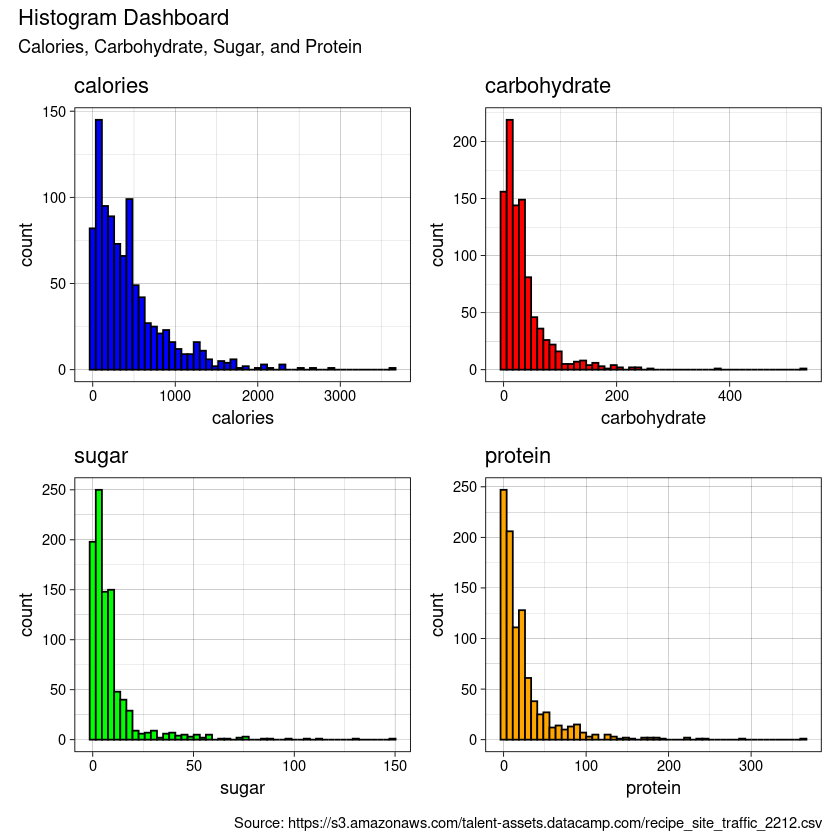

In [8]:
# Use patchwork to create a dashboard of plots of single variables.
# Visualize the distribution of the continuous variables.

hist_cal <- recipe_site_traffic %>% ggplot(aes(calories)) + geom_histogram(fill = "blue", color = "black", bins = 50) + theme_linedraw() + 
ggtitle("calories")

hist_carb <- recipe_site_traffic %>% ggplot(aes(carbohydrate)) + geom_histogram(fill = "red", color = "black", bins = 50) + theme_linedraw() + ggtitle("carbohydrate")

hist_sugar <- recipe_site_traffic %>% ggplot(aes(sugar)) + geom_histogram(fill = "green", color = "black", bins = 50) + theme_linedraw() + 
ggtitle("sugar")

hist_prot <- recipe_site_traffic %>% ggplot(aes(protein)) + geom_histogram(fill = "orange", color = "black", bins = 50) + theme_linedraw() + 
ggtitle("protein")

hist_combined <- hist_cal + hist_carb + hist_sugar + hist_prot

hist_combined <- hist_combined + 
plot_annotation(
title = "Histogram Dashboard",
subtitle = "Calories, Carbohydrate, Sugar, and Protein",
caption = "Source: https://s3.amazonaws.com/talent-assets.datacamp.com/recipe_site_traffic_2212.csv"
)

hist_combined

### Single variable plots part 2

Here I will further illustrate the count of each category of recipe in the dataset to understand how our recipes are distributed by category.

After plotting this the first time I noticed that there were two categories of chicken: chicken breast, and chicken.  There is also an obscure "meat" category, which I assume would be beef.  Last, potatoes are vegetables, and so I believe this value needs to be included with "vegetables".  This will reduce the number of dimensions our plot has and make trends clearer.

Without collapsing the categories, breakfast was the most popular followed by chicken breast.  However, now we see that overall chicken is the most popular followed closely by vegetables.  All other recipes seem to fall far behind!

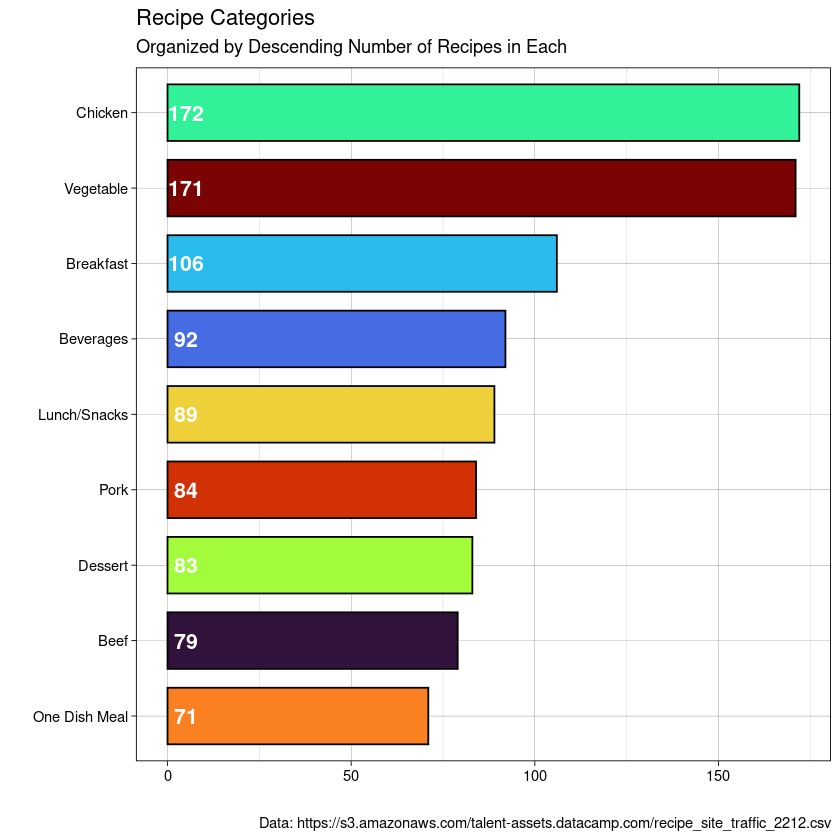

In [9]:
# Use the janitor package to create a tidy tibble with values and percentages.
# Color with viridis

install.packages("viridis", quiet = TRUE)
library(viridis, quietly = TRUE)

# Dimensionality reduction using if_else to reduce category options

recipe_site_traffic <- recipe_site_traffic %>% 
mutate(category = if_else(category == "Potato", "Vegetable", 
						  if_else(category == "Chicken Breast", "Chicken",
								 if_else(category == "Meat", "Beef", category
										)
								 )
						 )
	  )

# Plot!

recipe_site_traffic %>% 
tabyl(category) %>% 
mutate(percent = percent * 100) %>% 
ggplot(aes(reorder(category, n), n, fill = category, label = n)) +
geom_col(color = "black", 
		width = 0.75,
		position = "dodge"
		) +
geom_text(aes(reorder(category, n), 5),
			 color = "white",
			 size = 4.5,
			 fontface = "bold"
			 ) +
labs(title = "Recipe Categories",
	subtitle = "Organized by Descending Number of Recipes in Each",
	x = "",
	y = "",
	caption = "Data: https://s3.amazonaws.com/talent-assets.datacamp.com/recipe_site_traffic_2212.csv"
	) +
coord_flip() +
guides(fill = "none") + 
theme_linedraw() +
scale_fill_viridis_d(option = "turbo")

### Multiple variable plot

We may be wondering what the relationship is between the category of food and calories.  To take this one step further, it may give us more information if we see such a visualization faceted by high and low traffic.  This way we can see, do low traffic or high traffic foods tend to provide more calories?

Clearly, after reviewing the plot below, we can see that high traffic foods tend to have higher calories.  The distributions after being faceted by traffic level seem to remain fairly consistent.

While constituting a lower number of the recipes, pork, beef, one dish meals, chicken, and lunch/snacks seem to lead in calories.

[1] "Average calories seem to be higher for more popular recipes!"

high_traffic,avg_calories
<dbl>,<dbl>
0,396.3148
1,461.6882


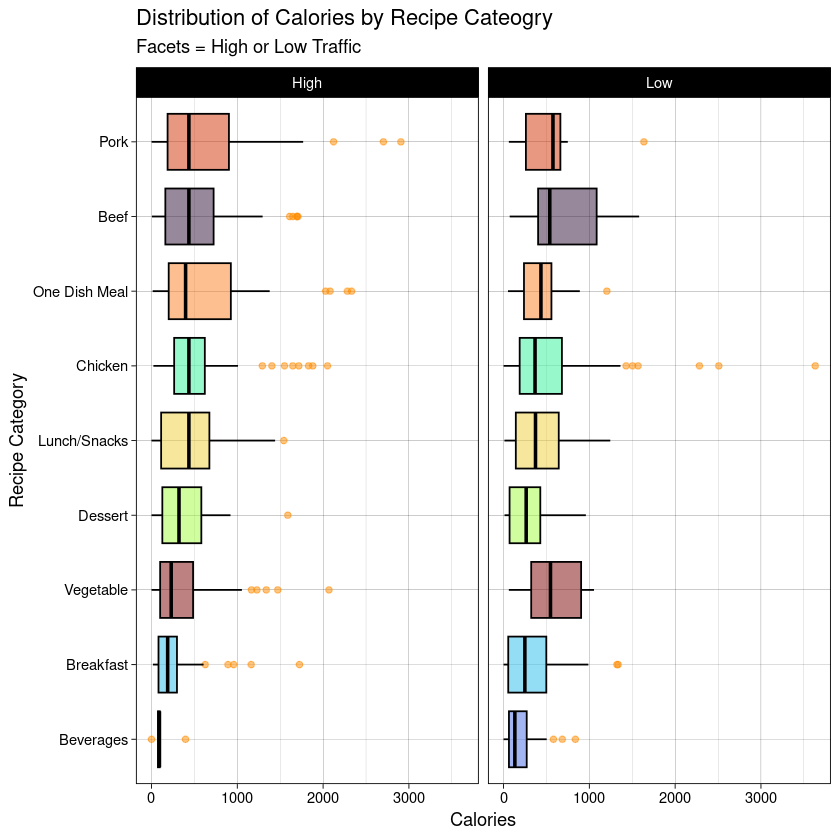

In [10]:
# Visualize average calories by high or low traffic

paste0("Average calories seem to be higher for more popular recipes!")

recipe_site_traffic %>% 
group_by(high_traffic) %>% 
summarize(avg_calories = mean(calories))

recipe_site_traffic %>% 
ggplot(aes(reorder(category, calories), calories, fill = category)) + 
geom_boxplot(color = "black",
			outlier.color = "darkorange",
			alpha = 0.5
			) +
facet_wrap(~ if_else(high_traffic == 1, "High", "Low")) +
coord_flip() + 
labs(x = "Recipe Category",
	y = "Calories",
	title = "Distribution of Calories by Recipe Cateogry",
	subtitle = "Facets = High or Low Traffic",
	fill = ""
	) + 
guides(fill = "none",
	  color = "none",
	  legend = "none"
	  ) + 
theme_linedraw() + 
scale_fill_viridis_d(option = "turbo")

### Description of findings

**Based on the analyses of the dataset provided, several key findings can be summarized:**

**Data Problems:** The dataset had some structural issues, including non-numeric character vectors for recipe and servings columns. Additionally, 52 rows contain missing values (NA) in columns from calories through protein, constituting 5% of the data in those columns. The high_traffic column had 39% missing values, while overall, 7.7% of the data are missing across the entire dataset.

**Data Manipulation:** To prepare the dataset for further analysis, certain steps were taken. The recipe column was kept as a character vector, as treating it as a factor would have resulted in too many levels. The missing values in the calories through protein columns were imputed using the 'mice' package, employing an appropriate imputation method using the mean of each column. The high_traffic column was modified to replace missing values with "Low" and converted to a binary column (0 for "Low" and 1 for "High"). The servings column needed adjustments to ensure all values aligned with the intended structure and can be used as a factor.

**Data Transformation:** Mean imputation was recommended for the numeric columns to handle missing values. The high_traffic column was transformed into a binary variable using the dplyr package's if_else statement. The servings column was cleaned to conform to the majority structure. Other columns were deemed suitable for further analysis without modification.

**Dataset Readiness:** After addressing the necessary modifications, the dataset is deemed complete and ready for exploratory analysis. Plots were created to visualize the distribution of numeric variables, revealing their non-normal distribution with positive skewness, likely influenced by high-glycemic and high-fat foods. Additionally, a plot showcasing the count of each recipe category highlights the need for collapsing certain categories to improve clarity and identify trends.

**Recipe Categories and Calories:** After collapsing categories, chicken emerges as the most popular recipe, closely followed by vegetables. Breakfast was initially the most popular category but is now surpassed by chicken after transformations to the category variable. Plotting the relationship between recipe category and calories, faceted by high and low traffic, reveals that high traffic foods tend to have higher calories. Pork, beef, one dish meals, chicken, and lunch/snacks stand out as higher calorie categories, despite constituting a smaller proportion of recipes.

**Conclusion:** After successfully manipulating and preparing the dataset for analysis, all identified data problems have been addressed. The structural issues, such as non-numeric character vectors in the recipe and servings columns, have been resolved. Missing values, accounting for 5% of the data in the calories through protein columns and 39% in the high_traffic column, have been imputed using appropriate methods. The servings column has been cleaned and aligned with the majority structure.

With the dataset now ready for modeling, exploratory data analysis has revealed robust relationships between recipe category, calories, and recipe popularity. Chicken has emerged as the most popular recipe, closely followed by vegetables, surpassing breakfast in popularity. Plots depicting the relationship between recipe category and calories, faceted by high and low traffic, indicate that high traffic foods tend to have higher calorie content. Notably, pork, beef, one dish meals, chicken, and lunch/snacks stand out as higher calorie categories, despite constituting a smaller proportion of recipes.

The dataset is now primed for further analysis and modeling, offering valuable insights into recipe categories, calorie distribution, and their association with recipe popularity.

## Model Fitting

### The Problem

Based on the information provided, the problem at hand is a classification problem. The response variable, high_traffic, is a binary variable indicating whether a recipe on Tasty Byte's website is popular or not. The objective is to predict which recipes will be popular, with a desired accuracy of 80% or higher, while minimizing the display of unpopular recipes.

In a classification problem, the goal is to assign input data to predefined categories or classes. In this case, the task is to classify recipes into either popular or unpopular categories based on certain features or variables.

To tackle this problem, we can employ various classification algorithms such as logistic regression, decision trees, random forests, or support vector machines. These algorithms will analyze the relationship between the predictor variables (such as recipe, calories, protein, etc.) and the target variable (high_traffic) to make predictions.  In this case, we will fit a random forest model and a logistic regression model and compare their performance.

I chose to use a random forest algorithm, and a logistic regression algorithm.  Random forest models and logistic regression models are highly recommended for binary classification problems because they are both well-established and widely-used algorithms with strong theoretical foundations. Random forests handle non-linear relationships and interactions well, while logistic regression provides interpretable probabilities and handles linear relationships effectively.

The report will include details on the chosen algorithm, data preprocessing steps, model training and evaluation, and the resulting accuracy or performance metrics. Additionally, I will provide insights into the most influential factors contributing to recipe popularity based on the model's feature importance or coefficients.

**The Key Performance Indicator**

While achieving 80% accuracy for predicting recipe popularity might be challenging within the given time frame, I will aim to provide the best possible analysis and insights based on the available data.

### Trying a Random Forest Model

#### Create the training and test datasets

In order to adequately test these mathematical models, we need to have a training set for preparing our models (we will use the same training and test set for each model), and then a test set to see if we were able to make good predictions and correctly classify the recipes.

In [67]:
# Splitting the dataset into training and test sets
set.seed(42)  # for reproducibility

train <- recipe_site_traffic %>%
  slice_sample(prop = 0.75)

test <- recipe_site_traffic %>%
  anti_join(train)

Joining with `by = join_by(recipe, calories, carbohydrate, sugar, protein,
category, servings, high_traffic)`


#### Fit the Random Forest Model

The simplest model with the best impact is often the most helpful model.  

randomForest in R gives us a way to find the most influential variables in a regression model by running the randomForest, and then using the importance function to find the most important variables.

After exploring the initial random forest model with all variables as predictors, the following formula seems to be most interesting at the outset:

high_traffic ~ category + protein + calories + carbohydrate + sugar

We will proceed with this.

In [17]:
# Random Forest Model
install.packages(c("randomForest", "WVPlots", "yardstick"), quiet = TRUE)
library(randomForest, quietly = TRUE)
library(WVPlots, quietly = TRUE)
library(yardstick, quietly = TRUE)

# Set seed for reproduceable random number generation

set.seed(42)

also installing the dependencies ‘tibble’, ‘hardhat’



Attaching package: ‘yardstick’


The following object is masked from ‘package:readr’:

    spec




In [16]:
# Building the initial random forest model
rf_model <- randomForest(
  high_traffic ~ .,
  data = train,
  ntree = 500,  # Number of trees in the forest
  mtry = sqrt(ncol(train))  # Number of predictors per tree
)

# Extracting variable importance
var_importance <- importance(rf_model)

var_importance

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


,IncNodePurity
recipe,20.067707
calories,18.617314
carbohydrate,17.617216
sugar,17.308843
protein,25.850281
category,51.859117
servings,5.338408


In [68]:
# Building the final random forest model with selected variables
rf_model_selected <- randomForest(
  high_traffic ~ category + protein + calories + carbohydrate + sugar,
  data = train,
  ntree = 500,
  mtry = sqrt(ncol(train))
)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


### Random Forest Model Evaluation

#### Assessing Random Forest Performance

Below, we create a contingency table using base R (table function), and then utilize that table object to create a confusion matrix using yardstick's conf_mat function.  We are able to then create an output of the model's classification capabilities with the conf_mat object.

I will discuss the model performance in the next section.

In [69]:
# Predicting using the final random forest model
rf_prob <- predict(rf_model_selected, newdata = test)
rf_predictions <- if_else(rf_prob > 0.5, 1, 0)

# Get predictions into the test dataset and transform the binary variables back to categorical
test_pred <- cbind(test, as.data.frame(rf_predictions))

# Random Forest Model Evaluation
outcomes <- table(test_pred$high_traffic, test_pred$rf_predictions)

rf_confusion <- conf_mat(outcomes)

rf_confusion

summary(rf_confusion)

   
      0   1
  0  48  39
  1  40 110

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6666667
kap,binary,0.2843711
sens,binary,0.5454545
spec,binary,0.7382550
ppv,binary,0.5517241
npv,binary,0.7333333
mcc,binary,0.2843827
j_index,binary,0.2837096
bal_accuracy,binary,0.6418548


#### Visualization of Random Forest Model Classification Performance

As can be seen above, the Random Forest model has an accuracy of 67.5%.  The model is able to predict high traffic 74.5% of the time, and low traffic 55.7% of the time.  Let's now look at a logistic model and how it performs with classification.

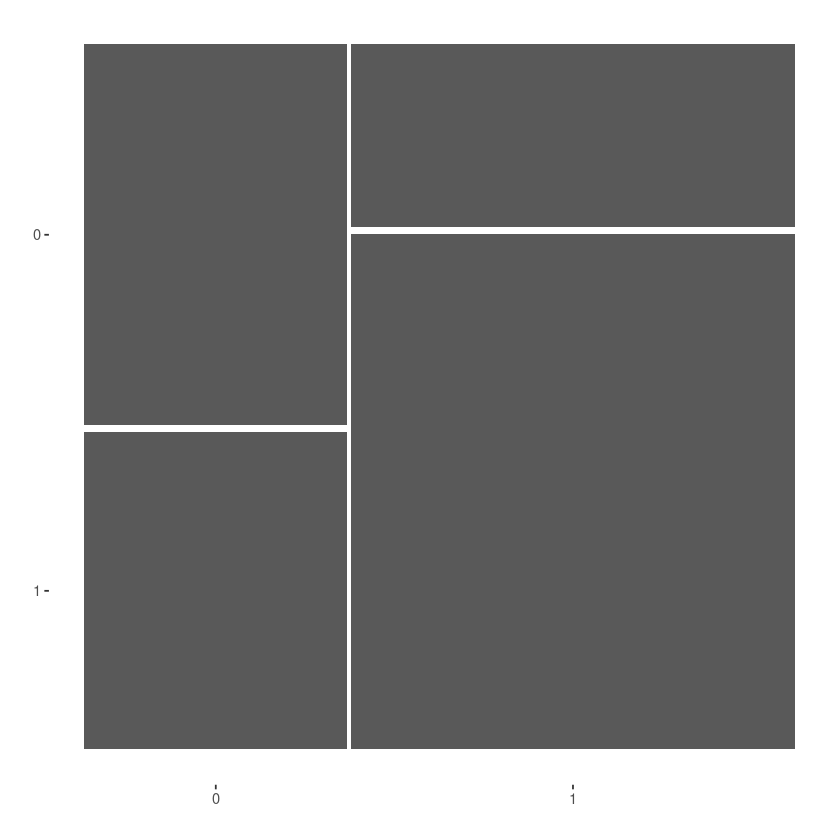

In [70]:
autoplot(rf_confusion)

### Try a Logistic Regression Model for Classification

#### Fit the Logistic Regression Model

Fit the model and calculate pseudo R^2.  The logistic model does not seem to explain much of the deviance in the model, which is concerning for future use.  We are able to use pseudo R^2 on the logistic model as we can access it using the glance function from the broom package.

Let's proceed by testing this model by making some predictions and then trying to see how the model classifies popular or unpopular recipes.

In [71]:
# Logistic Regression Model
logistic_model <- glm(
  high_traffic ~ category + protein + calories + carbohydrate + sugar,
  data = train,
  family = "binomial"
)

# Calculating pseudo R2 using broom::glance()
pseudo_r2 <- glance(logistic_model) %>%
  summarize(pR2 = 1 - deviance / null.deviance) %>%
  pull(pR2)

paste0("Pseudo R^2 is ", pseudo_r2, ".")

[1] "Pseudo R^2 is 0.310862222918084."

#### Assess Logistic Model Performance

Below, we create a contingency table again using base R (table function), and then utilize that table object to create a confusion matrix using yardstick's conf_mat function.  We are able to then create an output of the model's classification capabilities with the conf_mat object.  Upon examination of the confusion matrix results, it seems that the model seems to perform well with classification.

As before, I will discuss the model's performance in the following section.

In [72]:
# Predicting using the logistic regression model
logistic_prob <- predict(logistic_model, newdata = test, type = "response")
logistic_predictions <- ifelse(logistic_prob > 0.5, 1, 0)

test_pred <- cbind(test_pred, as.data.frame(logistic_predictions))

# Logistic Regression Model Evaluation
outcomes_log <- table(test_pred$high_traffic, test_pred$logistic_predictions)

logistic_confusion <- conf_mat(outcomes_log)

logistic_confusion

summary(logistic_confusion)

   
      0   1
  0  56  31
  1  31 119

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7383966
kap,binary,0.4370115
sens,binary,0.6436782
spec,binary,0.7933333
ppv,binary,0.6436782
npv,binary,0.7933333
mcc,binary,0.4370115
j_index,binary,0.4370115
bal_accuracy,binary,0.7185057


#### Visualization of Logistic Model Classification Performance and Summary

As can be seen above, the Logistic model has an accuracy of 73.8%.  The model is able to predict high traffic 79.3% of the time, and low traffic 64.4% of the time.

So far, it looks like the logistic model might fit the data best and help predict high or low traffic close to the 80% KPI that the business provided.

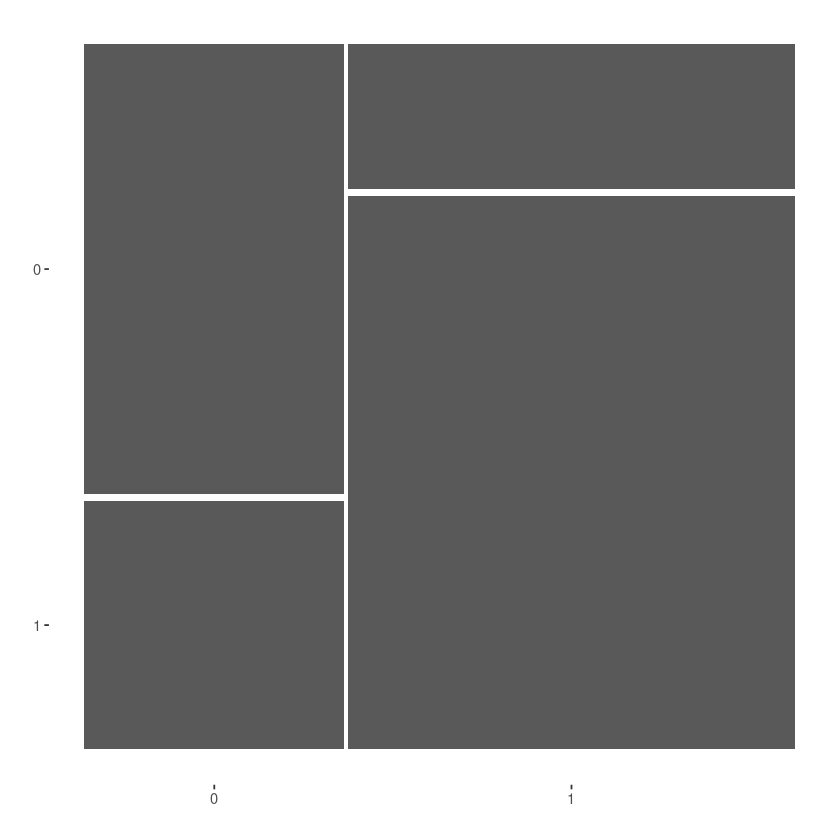

In [55]:
autoplot(logistic_confusion)

## Business Metrics

### Logistic and Random Forest Model Performance Summary

**Summary**

Tasty Bytes has a website where they list recipes, and through their website's logic, they can track the popularity of each recipe.  They have noticed that some recipes are more popular than others, and when they post a popular recipe it can increase traffic to the rest of their website by as much as 40%.

The product manager at Tasty Bytes has requested the data science team to create a binary classification model that will predict which recipes will be high traffic recipes at least 80% of the time.

The best model that I was able to identify in the time allotted was a logistic regression model that achieved a maximum of 73.8% accuracy in classifying recipes.  Specifically, the algorithm was able to correctly classify high traffic recipes 79.3% of the time, and low traffic recipes 64.4% of the time.  While this falls below the 80% threshold of the KPI of interest, it does approximate the KPI and shows promise for this approach.  It is clear that with more time and resources we could create a more accurate model.

What the comparison of these models shows, is that logistic regression may be a better business choice for Tasty Bytes in the future.  Future models should introduce new or different variables into the formula for the model and utilize interactions between variables (where applicable and appropriate) to test a more sophisticated algorithm to better predict high traffic recipes.  

### Recommendations

The category variable was the strongest predictor out of those used in this dataset.  It may be important to test different manipulations of that variable in order to see how a model may perform differently, for example, without manipulating it at all, or by trying to collapse categories even further.

The serving varible was not included in the model as it did not seem to factor into a large effect on the response variable high_traffic.  It would be important to see how this variable affects a logistic regression model for classification.

Other strong predictors were the continuous variables calories, carbohydrate, sugar, and protein.  It may be helpful to further manipulate the dataset to include features that explore the level of calories, carbohydrate, sugar, and protein.  For example, there could be "level" columns like calorie_level, carbohydrate_level, and so on.  These would be categorical columns that would show a binary outcome of "high" or "low" based on whether or not the calories in grams of the recipe is above the average in the dataset.  These types of categorical predictors could be helpful to understand whether or not recipes will be popular in the future, and could constitute new KPIs for Tasty Bytes such as how many recipes they list given the levels of calories, carbohydrate, sugar, and protein, and the categories of the recipes.  

**Wrap Up**

Thank you for taking the time to review my work and the findings.  There are some highly technical aspects of the work done in this report and if any explanations need to be made of the approaches I took to arrive at my findings, I will be happy to discuss in a future meeting.

I would like to have a meeting with the Head of Data Science and the product team to discuss these findings more to understand how we did in meeting the business's needs and where we can improve.

Have a great weekend, and be safe!